<a href="https://colab.research.google.com/github/daalopezm/Simple_Neural_Network/blob/main/network_made_by_myself.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Texto de título predeterminado
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles, make_moons

In [ ]:
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)
#X, y = make_moons(n_samples=1000, noise=0.1)

(-2.5, 2.5, -2.5, 2.5)

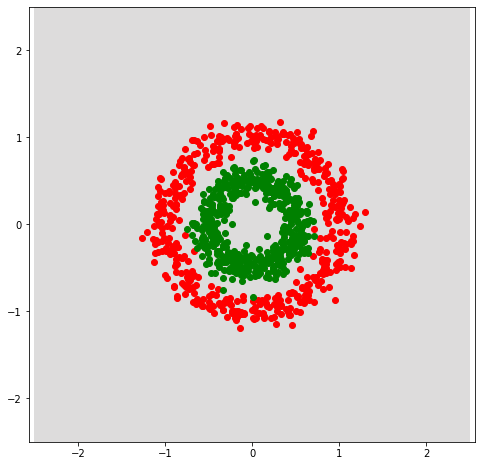

In [ ]:
res = 1000

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-2.5, 2.5, res)
_x1 = np.linspace(-2.5, 2.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

plt.scatter(X[y==0,0], X[y==0,1],c='r')
plt.scatter(X[y==1,0], X[y==1,1],c='g')
plt.axis('equal')

In [ ]:
import tensorflow as tf
from matplotlib import animation
from IPython.core.display import display, HTML

In [ ]:
# Definimos los puntos de entrada de la red, para la matriz X e Y.

iX = X
iY = y

nn = [2, 10, 8, 1]  # número de neuronas por capa.

# Capa 1
W1 = tf.Variable(tf.random.uniform([nn[1],nn[0]], dtype='float64'), name='Weights_1', trainable=True)
b1 = tf.Variable(tf.random.uniform([nn[1],1], dtype='float64'), name='bias_1',trainable=True)


# Capa 2
W2 = tf.Variable(tf.random.uniform([nn[2], nn[1]], dtype='float64'), name='Weights_2',trainable=True)
b2 = tf.Variable(tf.random.uniform([nn[2],1], dtype='float64'), name='bias_2',trainable=True)


# Capa 3
W3 = tf.Variable(tf.random.normal([nn[3], nn[2]], dtype='float64'), name='Weights_3',trainable=True)
b3 = tf.Variable(tf.random.normal([nn[3],1], dtype='float64'), name='bias_3',trainable=True)


# Capa 4
# W4 = tf.Variable(tf.random.normal([nn[4], nn[3]], dtype='float64'), name='Weights_4',trainable=True)
# b4 = tf.Variable(tf.random.normal([nn[4],1], dtype='float64'), name='bias_4',trainable=True)


# Capa 5
# W5 = tf.Variable(tf.random.normal([nn[5], nn[4]], dtype='float64'), name='Weights_5',trainable=True)
# b5 = tf.Variable(tf.random.normal([nn[5],1], dtype='float64'), name='bias_5',trainable=True)

#trainable_variables = [W1,b1,W2,b2,W3,b3,W4,b4,W5,b5]
trainable_variables = [W1,b1,W2,b2,W3,b3]

iX=tf.Variable(X, trainable=False)

In [ ]:
lr = 0.4        # learning rate

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.7)

# Evaluación de las predicciones.
loss_object = tf.keras.losses.MeanSquaredError()

#loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=0.0, axis=-1, name='categorical_crossentropy')
# loss_object= tf.keras.losses.MeanAbsoluteError(name='mean_absolute_error')
# loss_object = tf.keras.losses.BinaryCrossentropy(
#     from_logits=False,
#     label_smoothing=0.0,
#     axis=-1,
#     name='binary_crossentropy'
# )


In [ ]:
@tf.function
def feedforward(X_input):
  l1 = tf.nn.relu(tf.add(tf.matmul(W1,tf.transpose(X_input)), b1))
  l2 = tf.nn.relu(tf.add(tf.matmul(W2,l1), b2))
  #l3 = tf.nn.relu(tf.add(tf.matmul(W3,l2), b3))
  #l4 = tf.nn.relu(tf.add(tf.matmul(W4,l3), b4))
  pY = tf.math.sigmoid(tf.add(tf.matmul(W3,l2), b3))[0, :]
  return pY

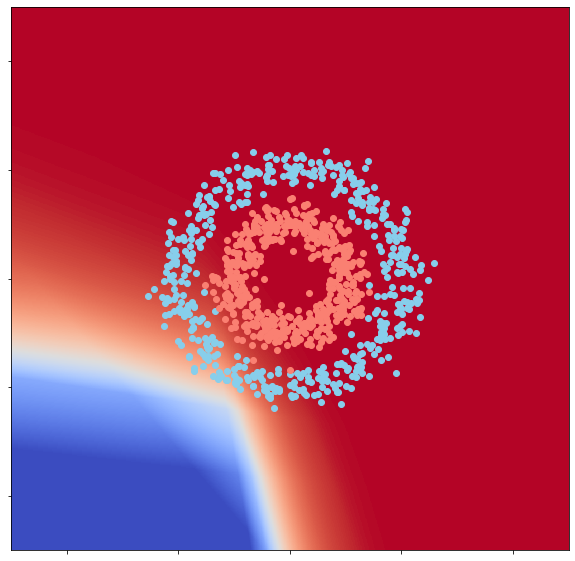

In [ ]:
fig = plt.figure(figsize=(10, 10))
_pY = feedforward(_pX)
_pY = tf.reshape(_pY,[res,res])
plt.pcolormesh(_x0,_x1, _pY, cmap='coolwarm', animated=True)
plt.scatter(X[y == 0,0], X[y == 0,1], c="skyblue")
plt.scatter(X[y == 1,0], X[y == 1,1], c="salmon")
plt.tick_params(labelbottom=False, labelleft=False)
       

In [ ]:
n_steps = 250 # Número de ciclos de entrenamiento.
iPY = [] # Aquí guardaremos la evolución de las predicción, para la animación.

#Let's train for some iterations
for step in range(n_steps):
  # Vector de predicciones de Y.
  with tf.GradientTape(persistent=True) as tape:
    pY = feedforward(iX)
    loss = loss_object(y_true=iY,y_pred=pY)
  grads = tape.gradient(target=loss, sources=trainable_variables)
  optimizer.apply_gradients(zip(grads, trainable_variables))
  
  if step % 2 == 0:       
    # Cálculo del accuracy.    
    acc = np.mean(np.round(pY) == y)
    
    # Impresión de métricas.
    print('- Step', step, '/', n_steps, '- Acc =', acc, '- Loss =', loss.numpy())
    
    # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.
    _pY = feedforward(_pX)
    _pY = tf.reshape(_pY,[res,res])          
    iPY.append(_pY)

- Step 0 / 250 - Acc = 0.5 - Loss = 0.4959583282470703
- Step 2 / 250 - Acc = 0.5 - Loss = 0.4953782260417938
- Step 4 / 250 - Acc = 0.5 - Loss = 0.4940764009952545
- Step 6 / 250 - Acc = 0.5 - Loss = 0.49174219369888306
- Step 8 / 250 - Acc = 0.5 - Loss = 0.4874784052371979
- Step 10 / 250 - Acc = 0.5 - Loss = 0.47914841771125793
- Step 12 / 250 - Acc = 0.5 - Loss = 0.4610951542854309
- Step 14 / 250 - Acc = 0.5 - Loss = 0.41666415333747864
- Step 16 / 250 - Acc = 0.505 - Loss = 0.34007972478866577
- Step 18 / 250 - Acc = 0.372 - Loss = 0.32115423679351807
- Step 20 / 250 - Acc = 0.456 - Loss = 0.28024590015411377
- Step 22 / 250 - Acc = 0.5 - Loss = 0.34191301465034485
- Step 24 / 250 - Acc = 0.493 - Loss = 0.34306466579437256
- Step 26 / 250 - Acc = 0.5 - Loss = 0.382459431886673
- Step 28 / 250 - Acc = 0.5 - Loss = 0.4008418619632721
- Step 30 / 250 - Acc = 0.5 - Loss = 0.3375510275363922
- Step 32 / 250 - Acc = 0.5 - Loss = 0.29725751280784607
- Step 34 / 250 - Acc = 0.687 - Loss 

In [ ]:
# ----- CÓDIGO ANIMACIÓN ----- #
ims = []
fig = plt.figure(figsize=(10, 10))
print("--- Generando animación ---")

for fr in range(len(iPY)):
  # Visualización de la nube de datos.
  plt.scatter(X[y == 0,0], X[y == 0,1], c="skyblue")
  plt.scatter(X[y == 1,0], X[y == 1,1], c="salmon")

  # plt.title("Resultado Clasificación")
  plt.tick_params(labelbottom=False, labelleft=False)

  im = plt.pcolormesh(_x0,_x1, iPY[fr], cmap='coolwarm', animated=True)
  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True, repeat_delay=2000)

HTML(ani.to_html5_video())